In [2]:
'''Importing Data Manipulation Modules'''
import numpy as np                 # Linear Algebra
import pandas as pd                # Data Processing, CSV file I/O (e.g. pd.read_csv)

'''Seaborn and Matplotlib Visualization'''
import matplotlib                  # 2D Plotting Library
import matplotlib.pyplot as plt
import seaborn as sns              # Python Data Visualization Library based on matplotlib
           # Python Geospatial Data Library
plt.style.use('fivethirtyeight')
%matplotlib inline
import os

'''Plotly Visualizations'''
import plotly as plotly                # Interactive Graphing Library for Python
import plotly.express as px
import plotly.graph_objects as go
from plotly.offline import init_notebook_mode, iplot, plot
init_notebook_mode(connected=True)

'''Spatial Visualizations'''
import folium
import folium.plugins
from folium.plugins import MarkerCluster
from folium import plugins

'''NLP - WordCloud'''
import wordcloud
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

'''Machine Learning'''
import sklearn
from sklearn import preprocessing
from sklearn import metrics
from sklearn.metrics import r2_score, mean_absolute_error
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
import timeit

from sklearn.preprocessing import scale, StandardScaler, RobustScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, KFold, StratifiedKFold, RandomizedSearchCV
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV, LinearRegression, ElasticNet,  HuberRegressor
from sklearn.metrics import mean_squared_error, r2_score
from xgboost import XGBRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.kernel_ridge import KernelRidge
from sklearn.utils import resample

from xgboost import XGBRegressor

#Model interpretation modules
import eli5
import lime
import lime.lime_tabular
import shap
shap.initjs()

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [3]:
# saving the dataset for later use

pd.set_option('display.max_columns', 500)
df_airbnb = pd.read_csv('../Data/first_iter_poi.csv')

In [4]:
df_airbnb.fillna({'Name':'','Security Deposit':0, 'Cleaning Fee':0, 'Host Response Rate':0, 'Amenities':'',
               'Reviews per Month':0, 'Review Scores Rating':0, 'Review Scores Accuracy':0,
               'Review Scores Cleanliness':0, 'Review Scores Checkin':0, 'Review Scores Communication':0,
               'Review Scores Location':0, 'Review Scores Value':0, 'Host Total Listings Count': 1, 'Bathrooms': 1,
               'Bedrooms':0, 'Beds': 1, 'Host Response Time': 'not specified'}, inplace=True)

In [5]:
df_airbnb.head(2)

Unnamed: 0        ID                                               Name  \
0           0    633276                Jacuzzi Suite, minutes to Times Sq.   
1           1  17285980  Private 1br in quiet Long Island City neighbor...   

    Latitude  Longitude  Price  Security Deposit  Cleaning Fee  \
0  40.746086 -73.946906  108.0             400.0          49.0   
1  40.734965 -73.935211   80.0             300.0          15.0   

   Host Response Rate  Host Total Listings Count Neighbourhood Cleansed  \
0               100.0                        2.0       Long Island City   
1                80.0                        1.0       Long Island City   

  Neighbourhood Group Cleansed Property Type  Accommodates  Bathrooms  \
0                       Queens         House           2.0        1.0   
1                       Queens     Apartment           3.0        1.0   

   Bedrooms  Beds                                          Amenities  \
0       1.0   1.0  TV,Internet,Wireless Internet,Air conditioning...   
1       1.0   1.0  Wireless Internet,Air conditioning,Kitchen,Hea...   

   Number of Reviews  Reviews per Month  rt_Entire home/apt  rt_Private room  \
0               89.0               1.58                   0                1   
1                1.0               0.38                   1                0   

   rt_Shared room  bg_Bronx  bg_Brooklyn  bg_Manhattan  bg_Queens  \
0               0         0            0             0          1   
1               0         0            0             0          1   

   bg_Staten Island  crime  income  h_a few days or more  h_not specified  \
0                 0   38.6   46829                     0                0   
1                 0   38.6   46829                     0                0   

   h_within a day  h_within a few hours  h_within an hour     Score  poi  
0               0                     1                 0  0.948571    1  
1               1                     0                 0  0.000000    0

In [6]:
# imports
import nltk

import nltk.corpus

from nltk.corpus import stopwords
from nltk import word_tokenize
from nltk.stem import WordNetLemmatizer
import string
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('maxent_ne_chunker')
nltk.download('words')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\LarsP\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\LarsP\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\LarsP\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     C:\Users\LarsP\AppData\Roaming\nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to
[nltk_data]     C:\Users\LarsP\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!


True

In [7]:
# Set the language of the library to english
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer() 

In [8]:
# By looking at the Airbnb website, we have divided the amenities into three categories: Common, Perks and Luxury. 
# The reason behind that is because some are almost a given when booking a listing and others are nice to have while others
# are unnecessary but are providing a luxury.

Amenities = ['TV','Wireless Internet','Kitchen','Heating','Essentials','Internet', 'Dryer','Hair dryer',
          'Washer','Air conditioning','Laptop Friendly Workspace', 'Family/kid friendly','Pets allowed',
          'Free parking on premise','Iron','Hangers','Dishwasher','Elevator in building','Private entrance',
          'Doorman Entry','Pool','BBQ grill','Patio or balcony']

In [9]:
for amen in Amenities:
    df_airbnb[amen] = 0

In [10]:
df_airbnb.head()

Unnamed: 0        ID                                               Name  \
0           0    633276                Jacuzzi Suite, minutes to Times Sq.   
1           1  17285980  Private 1br in quiet Long Island City neighbor...   
2           2  17938814    Beautiful spacious one bedroom, upper east side   
3           3  12762161                 Garden PentHouse 8Min to Manhattan   
4           4   9759331                 2BD located 1 stop from Manhattan!   

    Latitude  Longitude  Price  Security Deposit  Cleaning Fee  \
0  40.746086 -73.946906  108.0             400.0          49.0   
1  40.734965 -73.935211   80.0             300.0          15.0   
2  40.746234 -73.956953  115.0               0.0           0.0   
3  40.753186 -73.933830  395.0             500.0         150.0   
4  40.747142 -73.950003   55.0             100.0          40.0   

   Host Response Rate  Host Total Listings Count Neighbourhood Cleansed  \
0               100.0                        2.0       Long Island City   
1                80.0                        1.0       Long Island City   
2               100.0                        1.0       Long Island City   
3                90.0                        1.0       Long Island City   
4                 0.0                        1.0       Long Island City   

  Neighbourhood Group Cleansed Property Type  Accommodates  Bathrooms  \
0                       Queens         House           2.0        1.0   
1                       Queens     Apartment           3.0        1.0   
2                       Queens     Apartment           3.0        1.0   
3                       Queens     Apartment          12.0        2.0   
4                       Queens     Apartment           2.0        1.0   

   Bedrooms  Beds                                          Amenities  \
0       1.0   1.0  TV,Internet,Wireless Internet,Air conditioning...   
1       1.0   1.0  Wireless Internet,Air conditioning,Kitchen,Hea...   
2       1.0   2.0  TV,Cable TV,Wireless Internet,Kitchen,Smoking ...   
3       1.0   5.0  Internet,Wireless Internet,Air conditioning,Ki...   
4       2.0   2.0  TV,Internet,Wireless Internet,Kitchen,Buzzer/w...   

   Number of Reviews  Reviews per Month  rt_Entire home/apt  rt_Private room  \
0               89.0               1.58                   0                1   
1                1.0               0.38                   1                0   
2                3.0               3.00                   1                0   
3               24.0               2.38                   1                0   
4                1.0               0.06                   0                1   

   rt_Shared room  bg_Bronx  bg_Brooklyn  bg_Manhattan  bg_Queens  \
0               0         0            0             0          1   
1               0         0            0             0          1   
2               0         0            0             0          1   
3               0         0            0             0          1   
4               0         0            0             0          1   

   bg_Staten Island  crime  income  h_a few days or more  h_not specified  \
0                 0   38.6   46829                     0                0   
1                 0   38.6   46829                     0                0   
2                 0   38.6   46829                     0                0   
3                 0   38.6   46829                     0                0   
4                 0   38.6   46829                     0                1   

   h_within a day  h_within a few hours  h_within an hour     Score  poi  TV  \
0               0                     1                 0  0.948571    1   0   
1               1                     0                 0  0.000000    0   0   
2               0                     0                 1  0.942857    0   0   
3               1                     0                 0  0.945714    0   0   
4               0                     0                

In [11]:
#Categorizing the different amenities, to get a better understand of how many of which are present in the listing.
def list_Comparison(list1, list2):
    out = [item for item in list1 if item in list2]
    return out

In [12]:
for index, row in df_airbnb.iterrows():
    aux = row['Amenities'].split(',')
    for amen in Amenities:
        if amen in aux:
            df_airbnb.at[index,amen] = 1
    

### Machine Learning part

In [13]:
df_airbnb = df_airbnb.drop(['ID','Name', 'Property Type', 'Amenities'], axis=1)
df_airbnb.head(3)

Unnamed: 0   Latitude  Longitude  Price  Security Deposit  Cleaning Fee  \
0           0  40.746086 -73.946906  108.0             400.0          49.0   
1           1  40.734965 -73.935211   80.0             300.0          15.0   
2           2  40.746234 -73.956953  115.0               0.0           0.0   

   Host Response Rate  Host Total Listings Count Neighbourhood Cleansed  \
0               100.0                        2.0       Long Island City   
1                80.0                        1.0       Long Island City   
2               100.0                        1.0       Long Island City   

  Neighbourhood Group Cleansed  Accommodates  Bathrooms  Bedrooms  Beds  \
0                       Queens           2.0        1.0       1.0   1.0   
1                       Queens           3.0        1.0       1.0   1.0   
2                       Queens           3.0        1.0       1.0   2.0   

   Number of Reviews  Reviews per Month  rt_Entire home/apt  rt_Private room  \
0               89.0               1.58                   0                1   
1                1.0               0.38                   1                0   
2                3.0               3.00                   1                0   

   rt_Shared room  bg_Bronx  bg_Brooklyn  bg_Manhattan  bg_Queens  \
0               0         0            0             0          1   
1               0         0            0             0          1   
2               0         0            0             0          1   

   bg_Staten Island  crime  income  h_a few days or more  h_not specified  \
0                 0   38.6   46829                     0                0   
1                 0   38.6   46829                     0                0   
2                 0   38.6   46829                     0                0   

   h_within a day  h_within a few hours  h_within an hour     Score  poi  TV  \
0               0                     1                 0  0.948571    1   1   
1               1                     0                 0  0.000000    0   0   
2               0                     0                 1  0.942857    0   1   

   Wireless Internet  Kitchen  Heating  Essentials  Internet  Dryer  \
0                  1        1        1           1         1      1   
1                  1        1        1           1         0      0   
2                  1        1        1           1         0      0   

   Hair dryer  Washer  Air conditioning  Laptop Friendly Workspace  \
0           1       1                 1                          0   
1           0       0                 1                          0   
2           1       0                 0                          0   

   Family/kid friendly  Pets allowed  Free parking on premise  Iron  Hangers  \
0                    1             0                        0     1        1   
1                    1             0                        0     1        1   
2                    1             0                        0     1        1   

   Dishwasher  Elevator in building  Private entrance  Doorman Entry  Pool  \
0           0                     0                 0              0     0   
1           0                     0                 0              0     0   
2           0                     0                 0              0     0   

   BBQ grill  Patio or balcony  
0          0                 0  
1          0                 0  
2          0                 0

In [14]:
# one hot encoding the neighbourhood

dfDummies = pd.get_dummies(df_airbnb['Neighbourhood Cleansed'], prefix = 'h')
df_airbnb = pd.concat([df_airbnb, dfDummies], axis=1)

# Dropping the neighbourhood

df_airbnb.drop(['Neighbourhood Cleansed'], axis=1, inplace=True)

In [15]:
df_airbnb.head(1)

Unnamed: 0   Latitude  Longitude  Price  Security Deposit  Cleaning Fee  \
0           0  40.746086 -73.946906  108.0             400.0          49.0   

   Host Response Rate  Host Total Listings Count Neighbourhood Group Cleansed  \
0               100.0                        2.0                       Queens   

   Accommodates  Bathrooms  Bedrooms  Beds  Number of Reviews  \
0           2.0        1.0       1.0   1.0               89.0   

   Reviews per Month  rt_Entire home/apt  rt_Private room  rt_Shared room  \
0               1.58                   0                1               0   

   bg_Bronx  bg_Brooklyn  bg_Manhattan  bg_Queens  bg_Staten Island  crime  \
0         0            0             0          1                 0   38.6   

   income  h_a few days or more  h_not specified  h_within a day  \
0   46829                     0                0               0   

   h_within a few hours  h_within an hour     Score  poi  TV  \
0                     1                 0  0.948571    1   1   

   Wireless Internet  Kitchen  Heating  Essentials  Internet  Dryer  \
0                  1        1        1           1         1      1   

   Hair dryer  Washer  Air conditioning  Laptop Friendly Workspace  \
0           1       1                 1                          0   

   Family/kid friendly  Pets allowed  Free parking on premise  Iron  Hangers  \
0                    1             0                        0     1        1   

   Dishwasher  Elevator in building  Private entrance  Doorman Entry  Pool  \
0           0                     0                 0              0     0   

   BBQ grill  Patio or balcony  h_Allerton  h_Arden Heights  h_Arrochar  \
0          0                 0           0                0           0   

   h_Arverne  h_Astoria  h_Bath Beach  h_Battery Park City  h_Bay Ridge  \
0          0          0             0                    0            0   

   h_Bay Terrace  h_Bay Terrace, Staten Island  h_Baychester  h_Bayside  \
0              0                             0             0          0   

   h_Bayswater  h_Bedford-Stuyvesant  h_Belle Harbor  h_Bellerose  h_Belmont  \
0            0                     0               0            0          0   

   h_Bensonhurst  h_Bergen Beach  h_Boerum Hill  h_Borough Park  h_Briarwood  \
0              0               0              0               0            0   

   h_Brighton Beach  h_Bronxdale  h_Brooklyn Heights  h_Brownsville  \
0                 0            0                   0              0   

   h_Bushwick  h_Cambria Heights  h_Canarsie  h_Carroll Gardens  \
0           0                  0           0                  0   

   h_Castle Hill  h_Castleton Corners  h_Chelsea  h_Chinatown  h_City Island  \
0              0                    0          0            0              0   

   h_Civic Center  h_Claremont Village  h_Clason Point  h_Clifton  \
0               0                    0               0          0   

   h_Clinton Hill  h_Co-op City  h_Cobble Hill  h_College Point  \
0               0             0              0                0   

   h_Columbia St  h_Concord  h_Concourse  h_Concourse Village  h_Coney Island  \
0              0          0            0                    0               0   

   h_Corona  h_Country Club  h_Crown Heights  h_Cypress Hills  h_DUMBO  \
0         0               0                0                0        0   

   h_Ditmars Steinway  h_Dongan Hills  h_Douglaston  h_Downtown Brooklyn  \
0                   0               0             0                    0   

   h_Dyker Heights  h_East Elmhurst  h_East Flatbush  h_East Harlem  \
0                0                0                0              0   

   h_East Morrisania  h_East New York  h_East Village  h_Eastchester  \
0                  0                0               0              0   

   h_Edenwald  h_Edgemere  h_Elmhurst  h_Eltingville  h_Emerson Hill  \
0           0           0           0              0       

In [16]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(df_airbnb, df_airbnb["Neighbourhood Group Cleansed"]):
    strat_train_set = df_airbnb.loc[train_index]
    strat_test_set = df_airbnb.loc[test_index]

In [17]:
CleanDate = strat_test_set

In [18]:
# Creating the x and y sets
y_train = strat_train_set['Price']
X_train = strat_train_set.drop(['Price', 'Neighbourhood Group Cleansed'], axis=1)

y_test = strat_test_set['Price']
X_test = strat_test_set.drop(['Price', 'Neighbourhood Group Cleansed'], axis=1)

In [19]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [20]:
print('Dimensions of the training feature matrix: {}'.format(X_train.shape))
print('Dimensions of the training target vector: {}'.format(y_train.shape))
print('Dimensions of the test feature matrix: {}'.format(X_test.shape))
print('Dimensions of the test target vector: {}'.format(y_test.shape))

Dimensions of the training feature matrix: (32269, 270)
Dimensions of the training target vector: (32269,)
Dimensions of the test feature matrix: (8068, 270)
Dimensions of the test target vector: (8068,)


In [49]:
from sklearn.model_selection import KFold
from sklearn.metrics import explained_variance_score
# from sklearn.metrics import max_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_log_error
from sklearn.metrics import median_absolute_error
from sklearn.metrics import r2_score

n_folds = 5

# squared_loss
def metrics_cv(model):
    kf = KFold(n_folds, shuffle=True, random_state = 91).get_n_splits(df_airbnb)
    print("""Explained Variance Score: {}""".format(cross_val_score(model, X_train, y_train, scoring='explained_variance', cv=kf)))
    print("""Maximum error: {}""".format(cross_val_score(model, X_train, y_train, scoring='max_error', cv=kf)))
    print("""Mean Absolute Error: {}""".format(cross_val_score(model, X_train, y_train, scoring='neg_mean_absolute_error', cv=kf)))
    print("""Mean Squared Error: {}""".format(cross_val_score(model, X_train, y_train, scoring='neg_mean_squared_error', cv=kf)))
    print("""R2 Score: {}""".format(cross_val_score(model, X_train, y_train, scoring='r2', cv=kf)))
    print("""Median Absolute Error: {}""".format(cross_val_score(model, X_train, y_train, scoring='neg_median_absolute_error', cv=kf)))
    return cross_val_score(model, X_train, y_train, scoring='neg_mean_squared_error', cv=kf)

def rmse_lv_cv(model):
    kf = KFold(n_folds, shuffle=True, random_state = 91).get_n_splits(airbnb_playground)
    return cross_val_score(model, Xlv_train, y_train, scoring='neg_mean_squared_error', cv=kf)

In [19]:
from sklearn.tree import DecisionTreeRegressor

for Model in [LinearRegression, DecisionTreeRegressor, Ridge, Lasso, ElasticNet, RandomForestRegressor, XGBRegressor, HuberRegressor]:
    print('===========================================')
    print('Metrics for model {}'.format(Model.__name__))
    if Model == XGBRegressor: cv_res = metrics_cv(XGBRegressor(objective='reg:squarederror'))
    else: cv_res = metrics_cv(Model())
    print('===========================================')
    print('{}: {:.5f} +/- {:5f}'.format(Model.__name__, cv_res.mean(), cv_res.std()))
    print('===========================================')
    print('===========================================')

Metrics for model LinearRegression


ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "C:\Users\LarsP\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3326, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-19-474bdc7145d5>", line 7, in <module>
    else: cv_res = metrics_cv(Model())
  File "<ipython-input-18-2f7c5e1d4e9b>", line 15, in metrics_cv
    print("""Explained Variance Score: {}""".format(cross_val_score(model, X_train, y_train, scoring='explained_variance', cv=kf)))
  File "C:\Users\LarsP\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 391, in cross_val_score
    error_score=error_score)
  File "C:\Users\LarsP\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 232, in cross_validate
    for train, test in cv.split(X, y, groups))
  File "C:\Users\LarsP\Anaconda3\lib\site-packages\joblib\parallel.py", line 924, in __call__
    while self.dispatch_one_batch(iterator):
  File "C:\Users\LarsP\Anaconda3\lib\site-packag

KeyboardInterrupt: 

In [ ]:
RF = RandomForestRegressor(n_estimators=1500, min_samples_split=5, min_samples_leaf=1,
                          max_features='sqrt', max_depth=40, bootstrap=False)

RF.fit(X_train, y_train)

In [21]:
RF.score(X_test, y_test)

0.6699044962902991

In [84]:
from sklearn.model_selection import RandomizedSearchCV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 50, stop = 1000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4, 8]
# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

{'n_estimators': [50, 155, 261, 366, 472, 577, 683, 788, 894, 1000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4, 8], 'bootstrap': [True, False]}


In [ ]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor(random_state=42)
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 5, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed: 32.8min


In [ ]:
rf_random.bst_params_

In [30]:
rfOptimized = RandomForestRegressor(n_estimators=1000, min_samples_split = 5, min_samples_leaf=1, max_features= 'sqrt', max_depth = 40, bootstrap = False)

In [31]:
rfOptimized.fit(X_train, y_train)
rfOptimized.score(X_test, y_test)

0.6692933829920537

In [45]:
rfNormal = RandomForestRegressor()

In [46]:
rfNormal.fit(X_train, y_train)
rfNormal.score(X_test, y_test)

0.6212554507491825

## MLP

In [22]:
from sklearn.neural_network import MLPRegressor
mlpNormal = MLPRegressor(random_state = 42, max_iter=800)

In [ ]:
mlpNorm = MLPRegressor(max_iter=800)
param_grid = {
    'hidden_layer_sizes': [(90,)],
    'activation': ['logistic','identity', 'tanh', 'relu'],
    'solver': ['adam','sgd','lbfgs'],
    'alpha': [0.0005, 0.00005, 0.0001],
    'learning_rate': ['constant', 'adaptive','invscaling']
}
from sklearn.model_selection import GridSearchCV

clf = GridSearchCV(mlpNorm, parameter_space, n_jobs=-1, cv=5)
clf.fit(X_train, y_train)

In [70]:
mlpNormal.fit(X_train, y_train)
mlpNormal.score(X_test, y_test)

0.6001457287126979

In [82]:
mlpOptimized = MLPRegressor(hidden_layer_sizes=(90,65), max_iter=800, random_state = 42)

In [80]:
mlpOptimized.fit(X_train, y_train)
mlpOptimized.score(X_test, y_test)

0.5065389474815362

In [83]:
mlpOptimized.fit(X_train, y_train)
mlpOptimized.score(X_test, y_test)

0.4365147401558363

In [68]:
mlpOptimized = MLPRegressor(hidden_layer_sizes=(90,), max_iter=800, random_state = 42)

In [71]:
mlpOptimized.fit(X_train, y_train)
mlpOptimized.score(X_test, y_test)

C:\Users\LarsP\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (800) reached and the optimization hasn't converged yet.



0.6003064096702229

In [18]:
from sklearn.model_selection import KFold
from sklearn.metrics import explained_variance_score
from sklearn.metrics import max_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_log_error
from sklearn.metrics import median_absolute_error
from sklearn.metrics import r2_score
from sklearn.neural_network import MLPRegressor
from time import time

n_folds = 5

# squared_loss
def metrics_cv(model):
    kf = KFold(n_folds, shuffle=True, random_state = 91).get_n_splits(df_airbnb)
    print("""Explained Variance Score: {}""".format(cross_val_score(model, X_train, y_train, scoring='explained_variance', cv=kf)))
    print("""Maximum error: {}""".format(cross_val_score(model, X_train, y_train, scoring='max_error', cv=kf)))
    print("""Mean Absolute Error: {}""".format(cross_val_score(model, X_train, y_train, scoring='neg_mean_absolute_error', cv=kf)))
    print("""Mean Squared Error: {}""".format(cross_val_score(model, X_train, y_train, scoring='neg_mean_squared_error', cv=kf)))
    print("""R2 Score: {}""".format(cross_val_score(model, X_train, y_train, scoring='r2', cv=kf)))
    print("""Median Absolute Error: {}""".format(cross_val_score(model, X_train, y_train, scoring='neg_median_absolute_error', cv=kf)))
    return cross_val_score(model, X_train, y_train, scoring='neg_mean_squared_error', cv=kf)

def rmse_lv_cv(model):
    kf = KFold(n_folds, shuffle=True, random_state = 91).get_n_splits(airbnb_playground)
    return cross_val_score(model, Xlv_train, y_train, scoring='neg_mean_squared_error', cv=kf)
def rmse_cv(model):
    kf = KFold(n_folds, shuffle=True, random_state = 91).get_n_splits(airbnb_playground)
    return cross_val_score(model, X_train, y_train, scoring='neg_mean_squared_error', cv=kf)

In [23]:
classifiers1 = [
    LinearRegression(),
    MLPRegressor(random_state = 42, max_iter=1200),
    MLPRegressor(hidden_layer_sizes=(90,), max_iter=1200, random_state = 42),
    RandomForestRegressor(),
    RandomForestRegressor(n_estimators=1000, min_samples_split = 5, min_samples_leaf=1, max_features= 'sqrt', max_depth = 40, bootstrap = False)
]
classifier_names1 = [
    "LinearRegression1", 
    "NeuralNet",
    "NeuralNet",
    "RandomForrest",
    "RandomForrestOptimized"
]

In [24]:
for clf, clf_name in zip(classifiers1, classifier_names1):
    print(f"** {clf_name}")
    t0 = time()
    clf.fit(X_train, y_train)
    t1 = time()
    print(f"\tTraining time:\t\t{t1-t0:3.3f}")
    score_train = clf.score(X_train[0:10000], y_train[0:10000])
    t2 = time()
    print(f"\tPrediction time(train):\t{t2-t1:3.3f}")
    score_test = clf.score(X_test, y_test)
    t3 = time()
    print(f"\tPrediction time(test):\t{t3-t2:3.3f}")
    print(f"\tScore Train: {score_train:.3f}\tScore Test: {score_test:.3f}")
    predictions = clf.predict(X_test)
    mse = mean_squared_error(y_test, predictions)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, predictions)
    score = r2_score(y_test, predictions)
    evs = explained_variance_score(y_test, predictions)
    print(f"\tMSE: {mse:.3f}\tRMSE: {rmse:.3f}\tMAE: {mae:.3f}")
    print(f"\tScore: {score:.3f}\tEVS: {evs:.3f}")

** LinearRegression1
	Training time:		0.219
	Prediction time(train):	0.024
	Prediction time(test):	0.006
	Score Train: 0.578	Score Test: -21905276484085172.000
	MSE: 258833860497565417472.000	RMSE: 16088314408.215	MAE: 201015898.579
	Score: -21905276484085172.000	EVS: -21903266023244616.000
** NeuralNet
	Training time:		147.511
	Prediction time(train):	0.037
	Prediction time(test):	0.016
	Score Train: 0.696	Score Test: 0.600
	MSE: 4724.698	RMSE: 68.736	MAE: 42.757
	Score: 0.600	EVS: 0.619
** NeuralNet
	Training time:		172.667
	Prediction time(train):	0.034
	Prediction time(test):	0.014
	Score Train: 0.703	Score Test: 0.592
	MSE: 4825.675	RMSE: 69.467	MAE: 43.621
	Score: 0.592	EVS: 0.612
** RandomForrest
	Training time:		4.796
	Prediction time(train):	0.038
	Prediction time(test):	0.031
	Score Train: 0.926	Score Test: 0.622
	MSE: 4463.952	RMSE: 66.813	MAE: 39.228
	Score: 0.622	EVS: 0.622
** RandomForrestOptimized
	Training time:		107.903
	Prediction time(train):	2.411
	Prediction time(t

In [42]:
# Visualizing the results 

In [23]:
rfr = RandomForestRegressor(n_estimators=1000, min_samples_split = 5, min_samples_leaf=1, max_features= 'sqrt', max_depth = 40, bootstrap = False)
mlp = MLPRegressor(hidden_layer_sizes=(90), max_iter=800)

In [24]:
rfr.fit(X_train, y_train)
mlp.fit(X_train, y_train)

MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=90, learning_rate='constant',
             learning_rate_init=0.001, max_iter=800, momentum=0.9,
             n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
             random_state=None, shuffle=True, solver='adam', tol=0.0001,
             validation_fraction=0.1, verbose=False, warm_start=False)

In [27]:
y_predictsRF = rfr.predict(X_test)
y_predictsMLP = mlp.predict(X_test)

In [28]:
error_airbnbRF = pd.DataFrame({
        'Actual Values': np.array(y_test).flatten(),
        'Predicted Values': y_predictsRF.flatten()})

error_airbnbRF

Actual Values  Predicted Values
0             150.0         69.259093
1             153.0         94.297748
2              99.0         95.217750
3             749.0        598.280083
4              95.0         70.564506
...             ...               ...
8063           69.0         80.453704
8064          118.0         98.985000
8065          125.0        190.261070
8066           75.0         92.158103
8067          300.0        125.082663

[8068 rows x 2 columns]

In [29]:
error_airbnbMLP = pd.DataFrame({
        'Actual Values': np.array(y_test).flatten(),
        'Predicted Values': y_predictsMLP.flatten()})

error_airbnbMLP

Actual Values  Predicted Values
0             150.0         47.670366
1             153.0         73.400140
2              99.0         79.633519
3             749.0        626.677667
4              95.0         58.326071
...             ...               ...
8063           69.0         76.071752
8064          118.0         69.955186
8065          125.0        183.689906
8066           75.0         27.440921
8067          300.0        134.105244

[8068 rows x 2 columns]

In [30]:
CleanDataIndexReset = CleanDate.reset_index()

In [31]:
resultRF = pd.concat([error_airbnbRF, CleanDataIndexReset['Neighbourhood Group Cleansed']], axis = 1).reindex(CleanDataIndexReset.index)
resultMLP = pd.concat([error_airbnbMLP, CleanDataIndexReset['Neighbourhood Group Cleansed']], axis = 1).reindex(CleanDataIndexReset.index)

In [40]:
RF_visual = resultRF.groupby('Neighbourhood Group Cleansed').mean().reset_index()
MLP_visual = resultMLP.groupby('Neighbourhood Group Cleansed').mean().reset_index()


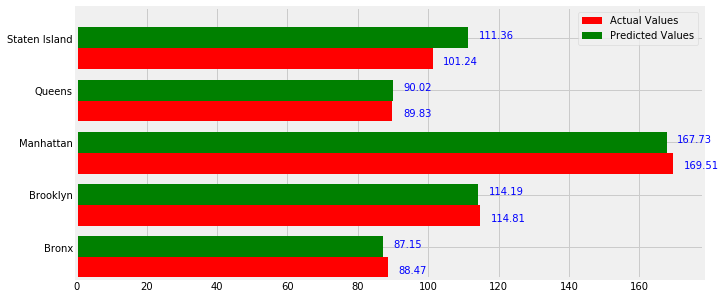

In [39]:
ind = np.arange(len(RF_visual))
width = 0.4

fig, ax = plt.subplots()
ax.barh(ind, RF_visual['Actual Values'], width, color='red', label='Actual Values')
ax.barh(ind + width, RF_visual['Predicted Values'], width, color='green', label='Predicted Values')

ax.set(yticks=ind + width, yticklabels=RF_visual['Neighbourhood Group Cleansed'], ylim=[2*width - 1, len(RF_visual)])
ax.legend()


for i, v in enumerate(RF_visual['Predicted Values'].round(2)):
    ax.text(v + 3, i + .40, str(v), color='blue')
for i, v in enumerate(RF_visual['Actual Values'].round(2)):
    ax.text(v + 3, i - .10, str(v), color='blue')

fig.set_size_inches(10, 5)

plt.show()

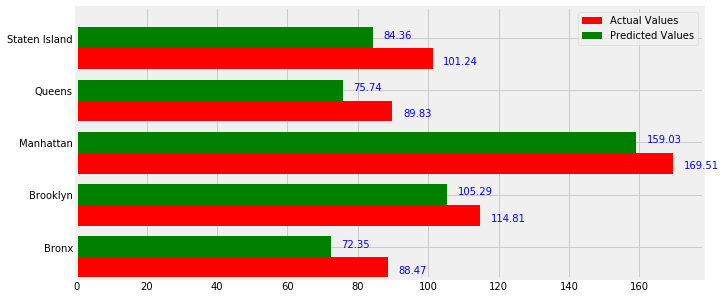

In [41]:
ind = np.arange(len(MLP_visual))
width = 0.4

fig, ax = plt.subplots()
ax.barh(ind, MLP_visual['Actual Values'], width, color='red', label='Actual Values')
ax.barh(ind + width, MLP_visual['Predicted Values'], width, color='green', label='Predicted Values')

ax.set(yticks=ind + width, yticklabels=MLP_visual['Neighbourhood Group Cleansed'], ylim=[2*width - 1, len(MLP_visual)])
ax.legend()


for i, v in enumerate(MLP_visual['Predicted Values'].round(2)):
    ax.text(v + 3, i + .40, str(v), color='blue')
for i, v in enumerate(MLP_visual['Actual Values'].round(2)):
    ax.text(v + 3, i - .10, str(v), color='blue')

fig.set_size_inches(10, 5)

plt.show()